 # Distributions: Specifying distributions

In [11]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [12]:
%matplotlib inline
az.style.use("arviz-darkgrid")
RANDOM_SEED = 8265
np.random.seed(RANDOM_SEED)

* Distributions as code
* What is: We had a p value distribution for our A/B test by why?
* A specific distribution fit our needs, the beta distribution
* There is math that specifies distributions
* But in our case we'll specifying distributions with code


# Distributions Parameterization
Using parameters and code to shape the distributions we'll work with

# The shape of the conversion distribution
Recall our A/B test example, we need a way to represent the probability of conversion

And not only one probability of conversion
* Every probability of conversion
* and our relative belief in each probability

# A possible  p(Conversion) distribution
One possible distribution is the one below, but *why* is this distribution the shape it is? And why is bounded from 0 to 1?

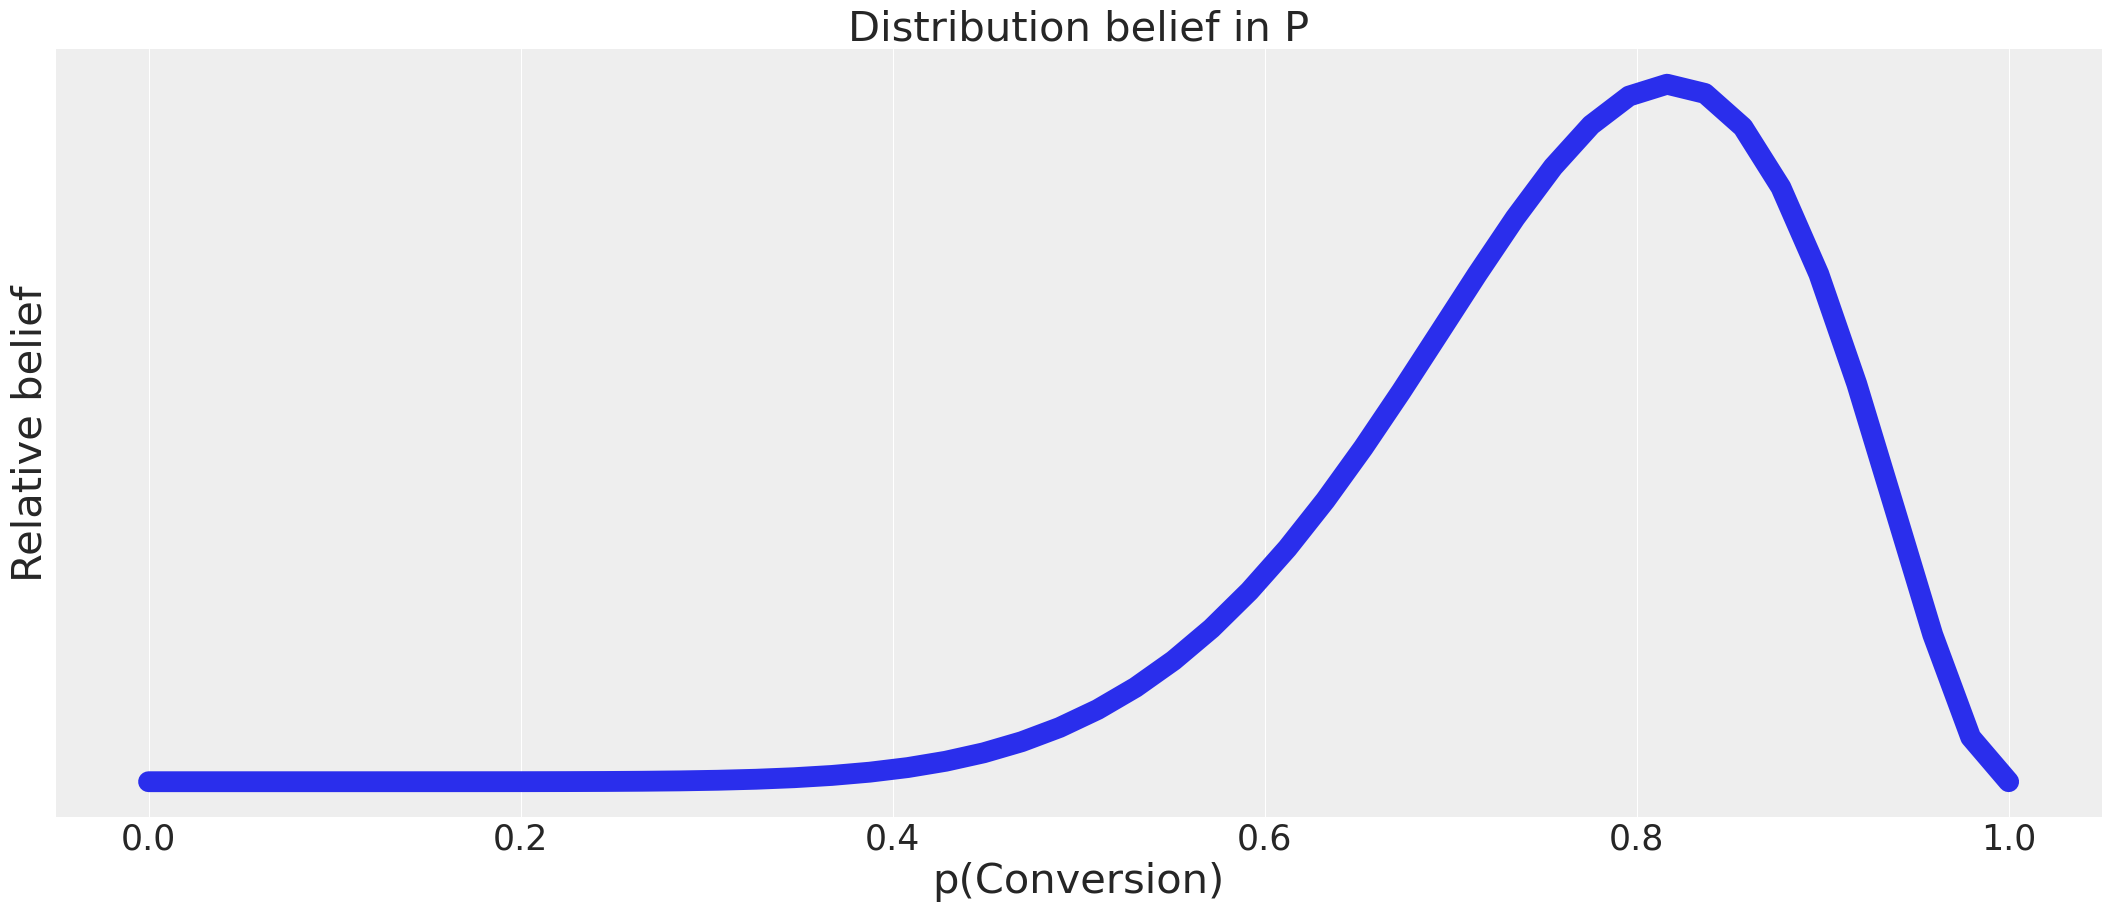

In [13]:
beta_dist = stats.beta(10, 3)
x = np.linspace(0, 1)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)


# Distribution choice and  parameters
It's because we chose both a *Beta* distribution and its *parameters*

The choice of Beta distributions bounds possible values to the domain of (0,1).
The choice of parameters is what specifies the shape of the Beta distribution

In this case the distribution is a *Beta(10, 3)*


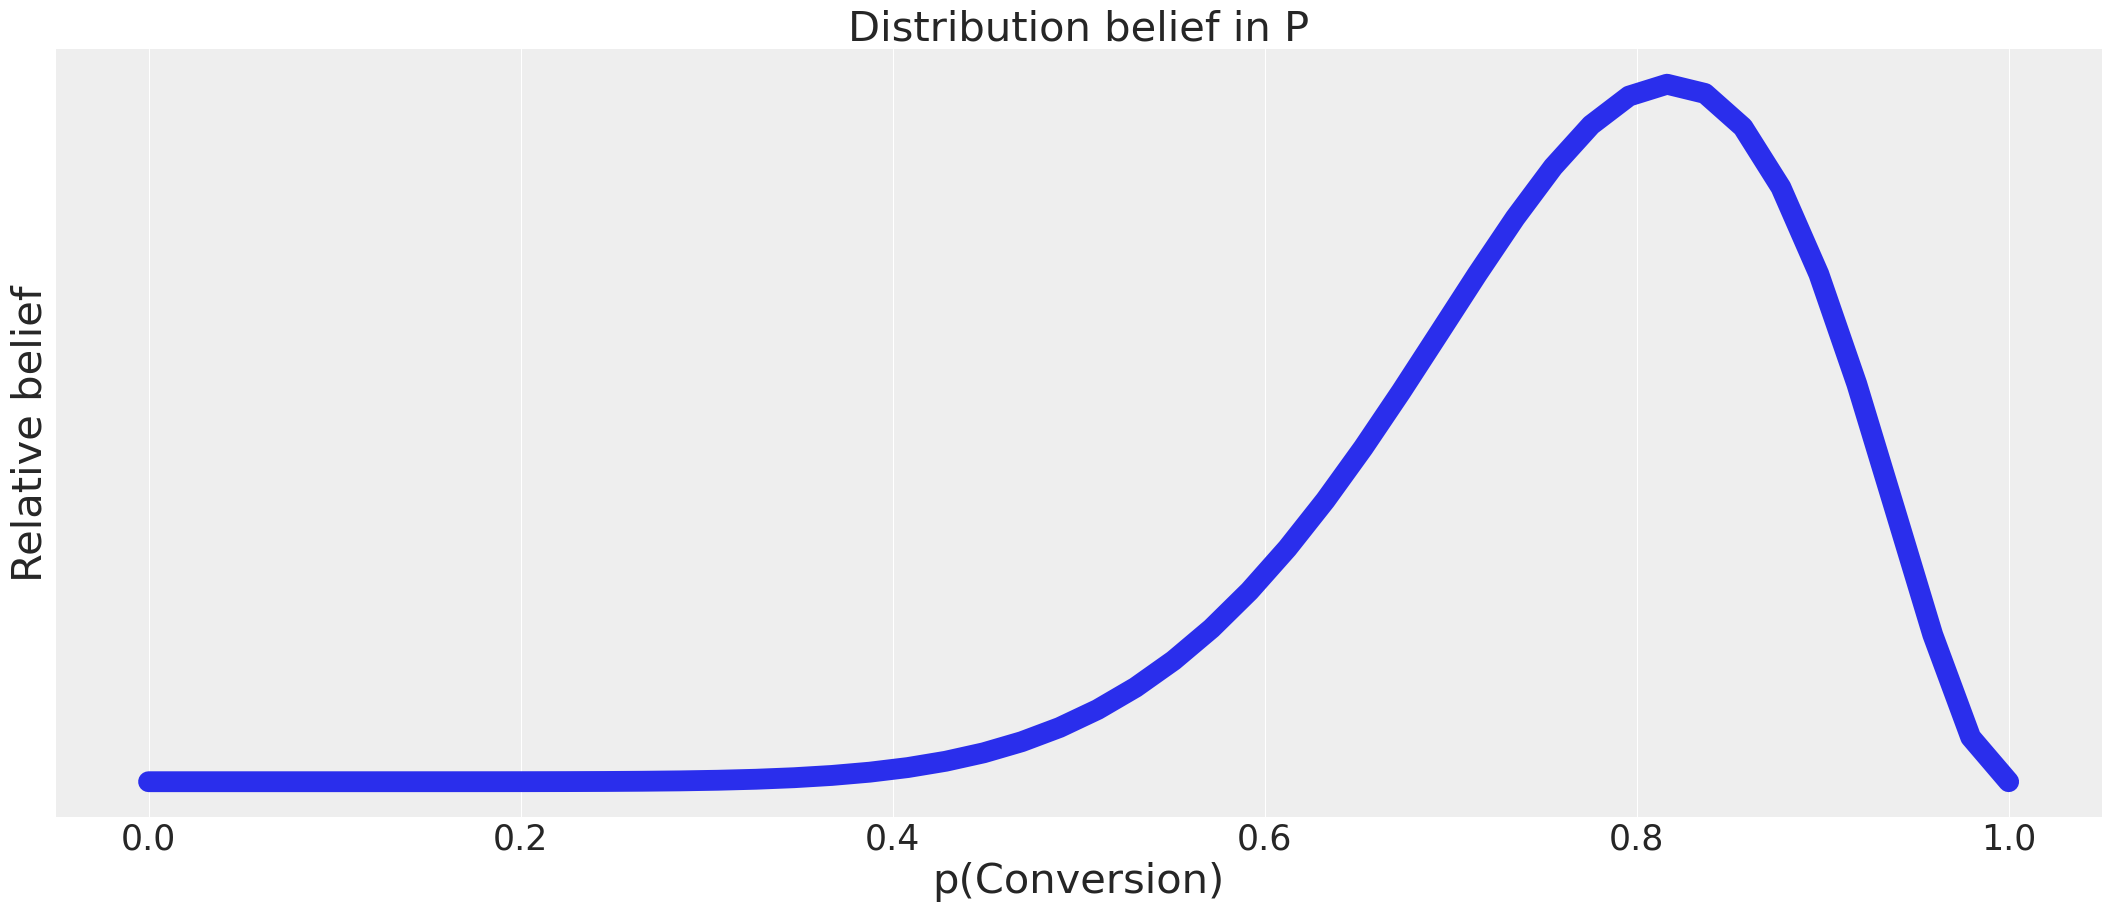

In [14]:
beta_dist = stats.beta(10, 3)
x = np.linspace(0, 1)
y = beta_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution belief in P", fontsize=30)
ax.set_xlabel("p(Conversion)", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)

# Other choices of distribution parameters
Below are three distributions with different parameterizations. 

They all have different shapes based on the different parameters used to specify each, even though all are *beta* distributions

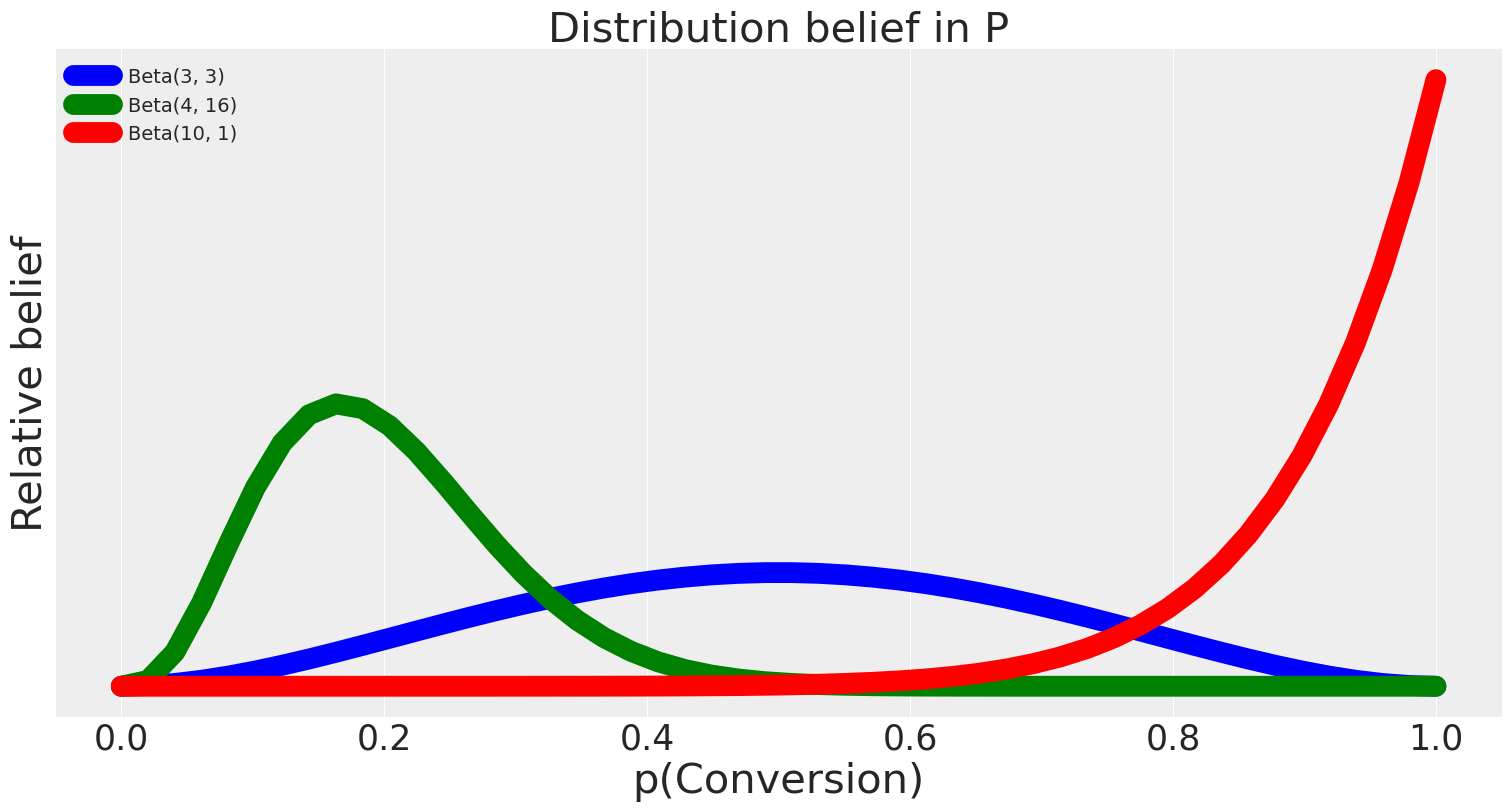

In [15]:
fig, ax = plt.subplots(figsize=(15,8))

for i, (a, b, c) in enumerate(((3,3,'blue'), (4,16,'green'), (10,1,'red'))):

    beta_dist = stats.beta(a, b)
    x = np.linspace(0, 1)
    y = beta_dist.pdf(x)
    ax.plot(x,y, linewidth=15, c=c, label=f"Beta({a}, {b})")

    ax.set_yticks([])
    ax.set_title("Distribution belief in P", fontsize=30)
    ax.set_xlabel("p(Conversion)", fontsize=30)
    ax.set_ylabel("Relative belief", fontsize=30)
    ax.tick_params(axis='x', labelsize=25)

ax.legend()

# Distributions as code, instead of math

Distributions have traditionally been specified with mathematical notional such as the one below. This theoretical definition is important for proofs and such

$$ \Large
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} 
$$

However in this course we will be specifying distributions with code. This will allow us to use distributions for computation as you'll see throughout this course.

In [16]:
beta_1 = stats.beta(1,2)
beta_2 = stats.beta(3, 10)

# 🤔 Notation and naming is not always consistent
Distributions are used by a wide variety of people across a wide variety of fields. The wide applicabiility is a great, but what is not is the subtle inconsistencies.

Mathematically identical distriibutoins can be parameterized using different symbols depending onn who wrote the code or library, even if the underlying distribution is the same.

For example, more mathematical authors will use greek symbols

In [18]:
μ = 0
σ =1
norm_1 = stats.norm(μ, σ)

Other times they are parameterized by the phonetic names

In [19]:
mu = 0
sigma =1
norm_1 = stats.norm(mu, sigma)

And in other cases they are parameterized by intuitive names, such as "loc" short for location, or "scale"

In [20]:
mu=0
sigma=1
norm_1 = stats.norm(loc=0, scale=1)

While we wish the world was standardized it unfortuately is not the case. Refer to the documentation of each library used to double check what you intend to specify is indeed what the library is expecting.

The good news is after some time you'll be able to read all forms of notation equally well.

# Section Recap
* Two things are needed to fully specify a distribution
    * The specific distribution itself
    * The parameters for that distribution
* This course will use distributions specified in code
* Distribution parameterization naming is not consistent across libraries and sources
  * Use references often when starting out to get thiings right